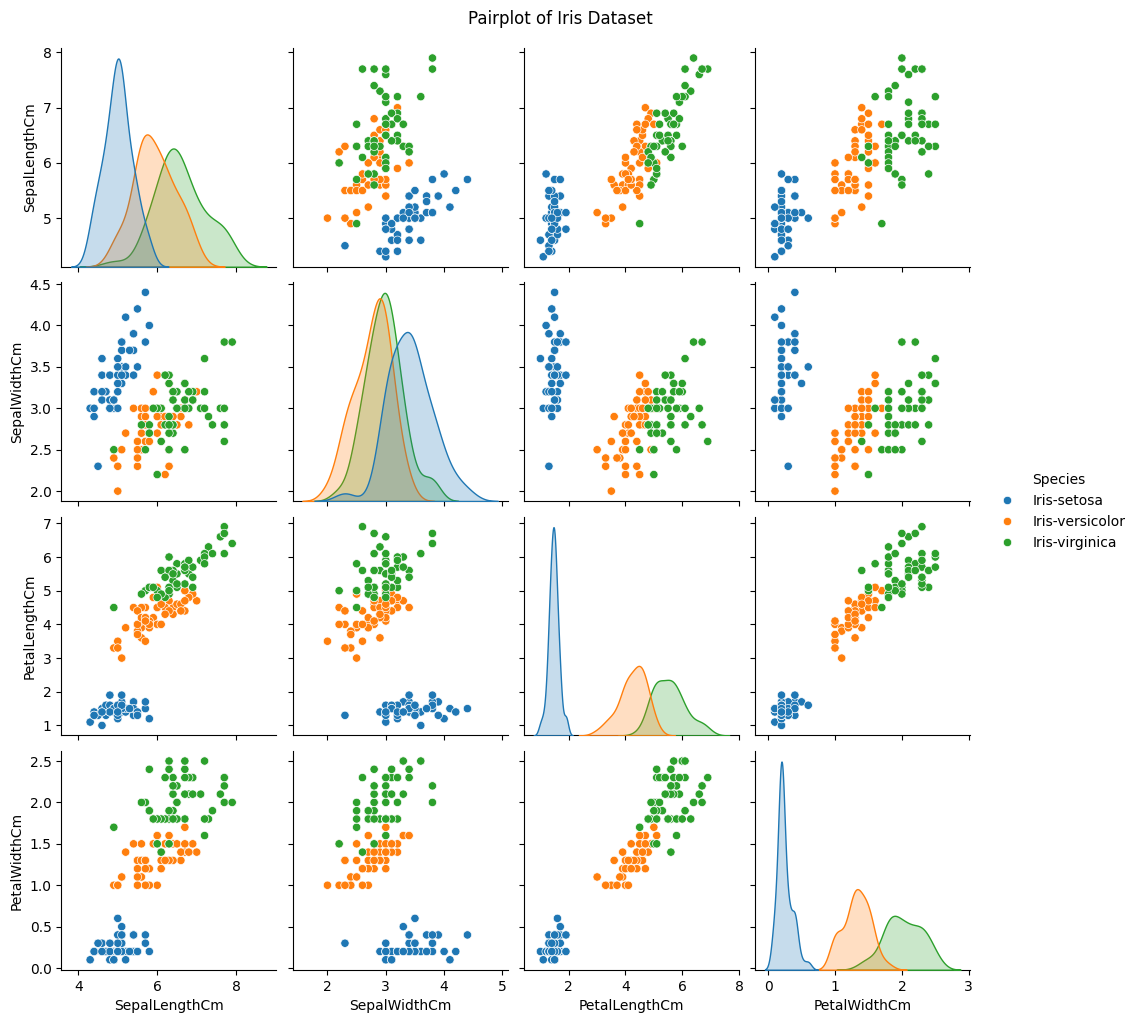

Accuracy: 1.0

 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



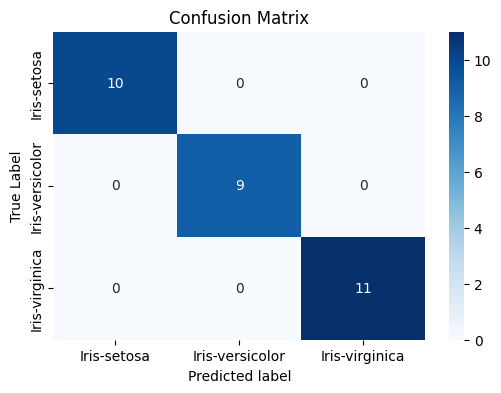

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


#Load the dataset
data = pd.read_csv('Iris.csv')
data = data.drop('Id',axis=1)

sns.pairplot(data,hue='Species')
plt.suptitle("Pairplot of Iris Dataset ",y=1.02)
plt.show()

X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = data['Species']

label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

accuracy= accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("\n Classification Report:\n",classification_report(y_test,y_pred,target_names=label_encoder.classes_))
cm= confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()